Source of data sets:
- covid-19 related datasets: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/discussion/136061
- population_by_country: https://www.kaggle.com/tanuprabhu/population-by-country-2020

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

import requests, zipfile

import geopandas as gpd
import descartes
#import shapely
#from shapely.geometry import Point, Polygon

%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
def extract_data(file_name, file_path):
    !kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f $file_name -p $file_path --force

In [4]:
# file names

file_name = 'covid_19_data.csv'

# file paths

data_path = os.path.join(os.path.curdir, 'data')
#data_path = os.path.join(os.path.pardir, 'web_app', 'data')

# download data file

extract_data(file_name, data_path)

100%|████████████████████████████████████████| 798k/798k [00:00<00:00, 2.66MB/s]
100%|████████████████████████████████████████| 798k/798k [00:00<00:00, 2.66MB/s]


In [13]:
import plotly.express as px

In [14]:
raw = pd.read_csv('data/covid_19_data.csv')

In [15]:
test_raw = pd.read_csv(r'./data/API_AG.LND.ARBL.HA.PC_DS2_en_csv_v2.csv', skiprows = 4)

In [16]:
test_raw.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Arable land (hectares per person),AG.LND.ARBL.HA.PC,NaN,0.036076,0.035571,0.035276,0.035068,0.034868,0.034653,0.034450,0.034255,0.034056,0.033862,0.033647,0.033422,0.033199,0.033043,0.032972,0.033011,0.033131,0.033276,0.033344,0.033280,...,0.026076,0.024899,0.024038,0.023405,0.022916,0.022471,0.022014,0.021529,0.021054,0.020615,0.020256,0.019994,0.019835,0.019759,0.019733,0.019714,0.019672,0.019598,0.019498,0.019382,0.019269,0.019168,NaN,NaN,NaN
1,Afghanistan,AFG,Arable land (hectares per person),AG.LND.ARBL.HA.PC,NaN,0.834537,0.823894,0.812884,0.801532,0.784833,0.771744,0.756221,0.739697,0.724128,0.707344,0.691901,0.674803,0.657642,0.641965,0.628262,0.616029,0.605317,0.597534,0.594438,0.597055,...,0.476296,0.447556,0.429055,0.418081,0.411207,0.394410,0.382358,0.366442,0.349319,0.336963,0.324060,0.311318,0.301003,0.292823,0.285557,0.278278,0.270561,0.262247,0.253771,0.245338,0.237224,0.230166,NaN,NaN,NaN
2,Angola,AGO,Arable land (hectares per person),AG.LND.ARBL.HA.PC,NaN,0.464104,0.460275,0.454818,0.451314,0.446537,0.443756,0.441154,0.438395,0.436574,0.427957,0.418635,0.408748,0.398463,0.387994,0.377482,0.367042,0.356660,0.346221,0.335589,0.324752,...,0.216743,0.210246,0.204328,0.198821,0.193494,0.188091,0.182471,0.176644,0.176411,0.181285,0.174920,0.168776,0.162863,0.161923,0.156254,0.177387,0.175445,0.194066,0.187280,0.188474,0.182018,0.175884,NaN,NaN,NaN


In [17]:
keepcolumns = ['Country Name', '1990', '2015']
value_variables = ['1990', '2015']

test_raw = test_raw[keepcolumns]

top10country = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Brazil', 'Italy', 'Canada']
    
test_raw = test_raw[test_raw['Country Name'].isin(top10country)]

# melt year columns  and convert year to date time
test_melt = test_raw.melt(id_vars='Country Name', value_vars = value_variables)
test_melt.columns = ['country','year', 'variable']
test_melt['year'] = test_melt['year'].astype('datetime64[ns]')

test_melt

,country,year,variable
0,Brazil,1990-01-01,0.339339
1,Canada,1990-01-01,1.637365
2,China,1990-01-01,0.109057
3,Germany,1990-01-01,0.150706
4,France,1990-01-01,0.303947
5,United Kingdom,1990-01-01,0.115638
6,India,1990-01-01,0.187855
7,Italy,1990-01-01,0.158888
8,Japan,1990-01-01,0.038596
9,United States,1990-01-01,0.743826


In [18]:
def df_prepare(dataset, pop_dataset=None, historical=False, continent=None, top_n = None):
    
    '''
    Clean data, join with population data (optional) and return dataframe.
    
    Args:
        dataset (str): path of the csv data file
        
        
    Return:
    
        df (DataFrame): pre-prepared data for geoplot / clean data for barplot and timeplot
        
    '''
    
    
    
    # read datasets
    
    df = pd.read_csv(dataset) #
    
    if pop_dataset:
        
        df_pop = pd.read_csv(pop_dataset, delimiter=";") # population dataset
        
    
    # clean data
    
    df = df.rename(columns={"ObservationDate": "Date", "Country/Region": "Country"})
    
    df = df.groupby(['Country', 'Date']).sum().reset_index()
    
    
    df['Country'] = df['Country'].replace({'UK': 'United Kingdom', 
                                           'US': 'United States', 
                                           'Mainland China': 'China',
                                           'Czech Republic': 'Czechia',
                                           })
    
    
    
    if pop_dataset:
    
        df = df.set_index('Country').join(df_pop.set_index('Country'))
        df.dropna(subset=['Population'], inplace=True)
        
        df['Infected'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
        
        df['Confirmed_percent'] = 100*df['Confirmed']/(df['Population'] + 1.0)
        df['Recovered_percent'] = 100*df['Recovered']/(df['Population'] + 1.0)
        df['Deaths_percent'] = 100*df['Deaths']/(df['Population'] + 1.0)
        df['Infected_percent'] = 100*df['Infected']/(df['Population'] + 1.0)
        
        df['Confirmed_per_100k'] = 100000*df['Confirmed']/(df['Population'] + 1.0)
        df['Recovered_per_100k'] = 100000*df['Recovered']/(df['Population'] + 1.0)
        df['Deaths_per_100k'] = 100000*df['Deaths']/(df['Population'] + 1.0)
        df['Infected_per_100k'] = 100000*df['Infected']/(df['Population'] + 1.0)
    
    # filter/select data based on continent, selected_countries and historical
    
        if continent:
            df = df[df['Continent'] == continent]
    
    #df = df.loc[df.index.isin(selected_countries), :]
    
    df = df.reset_index().set_index('Date')
    df.index = pd.to_datetime(df.index, infer_datetime_format=True)
    
    if historical:
        
        df = df.query("index >= '2020-02-20'")
        df = df[['Continent', 'Country', 'Population', 'Infected', 'Recovered', 'Deaths', 
                 'Infected_percent', 'Recovered_percent', 'Deaths_percent',
                 'Infected_per_100k', 'Recovered_per_100k', 'Deaths_per_100k']]
        
    else:
    
        df = df[df.index == df.index.max()]
        if pop_dataset:
            df = df[['Continent', 'Country', 'Short', 'Population', 'Infected', 'Recovered', 'Deaths', 
                     'Infected_percent', 'Recovered_percent', 'Deaths_percent',
                     'Infected_per_100k', 'Recovered_per_100k', 'Deaths_per_100k']]
            
            df = df.reset_index().set_index('Country')
        else:
            df = df[['Continent', 'Country', 'Population', 'Infected', 'Recovered', 'Deaths', 
                     'Infected_percent', 'Recovered_percent', 'Deaths_percent',
                     'Infected_per_100k', 'Recovered_per_100k', 'Deaths_per_100k']]
            
            df = df.reset_index().set_index('Country')
    
    
    return df
    

In [19]:
def plot_bar(var, continent = None, top_n = None):

    var_list_abs = ['Infected', 'Recovered', 'Deaths']
    var_list_rel1 = ['Infected_percent', 'Recovered_percent', 'Deaths_percent']
    var_list_rel2 = ['Infected_per_100k', 'Recovered_per_100k', 'Deaths_per_100k']

    continent_list = ['America', 'Europe', 'Asia', 'Africa', 'Oceania']

    if continent:
        assert continent in continent_list
    
    
    keyword1 = '_percent'
    keyword2 = '_per_100k'

    if keyword1 in var:
        
        stat = '(relative to population)'
        var_list = var_list_rel1
    
    elif keyword2 in var:
        
        stat = '(relative to population)'
        var_list = var_list_rel2
    
    else:
        stat = ''
        var_list = var_list_abs
        

    df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = False,
                    continent = continent)


    if continent == 'Oceania':
        fig_width = 5
    else:
        fig_width = 20
        
    if top_n:
        tot_countries = df.shape[0]
        if top_n > tot_countries:
            top_n = tot_countries
            
    if not continent:
        continent = "The World"
    
    df.sort_values(by=[var], ascending=False).loc[:, var_list][:top_n].plot.bar(
        title = '{}: Number of Infected, Recovered, Deaths {}'.format(continent, stat), 
        stacked = False,
        colormap='tab20b',
        figsize=(fig_width, 5)
        )
    
    plt.xticks(rotation=20)
    plt.legend(loc='upper right');
    
    #return df

In [20]:
def plot_bar2(var, continent = None, top_n = None):

    var_list_abs = ['Infected', 'Recovered', 'Deaths']
    var_list_rel1 = ['Infected_percent', 'Recovered_percent', 'Deaths_percent']
    var_list_rel2 = ['Infected_per_100k', 'Recovered_per_100k', 'Deaths_per_100k']

    continent_list = ['America', 'Europe', 'Asia', 'Africa', 'Oceania']

    if continent:
        assert continent in continent_list
    
    
    keyword1 = '_percent'
    keyword2 = '_per_100k'

    if keyword1 in var:
        
        stat = '(relative to population)'
        var_list = var_list_rel1
    
    elif keyword2 in var:
        
        stat = '(relative to population)'
        var_list = var_list_rel2
    
    else:
        stat = ''
        var_list = var_list_abs
        

    df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = False,
                    continent = continent)
        
    if top_n:
        tot_countries = df.shape[0]
        if top_n > tot_countries:
            top_n = tot_countries
            
    if not continent:
        continent = "The World"
    
    df = df.sort_values(by=[var], ascending=False).loc[:, var_list][:top_n].reset_index()
    
    return df

In [21]:
df_all = plot_bar2('Infected_per_100k', continent = '', top_n = 20)
df_all

,Country,Infected_per_100k,Recovered_per_100k,Deaths_per_100k
0,Luxembourg,367.743966,79.874884,6.549740
1,Iceland,321.177808,134.800905,1.758273
2,Spain,177.301662,86.487416,28.533982
3,Italy,154.125346,37.770939,27.327987
4,Switzerland,148.313797,93.083200,8.839207
5,Belgium,131.117282,34.392833,14.081561
6,France,111.238078,26.699958,13.674766
7,Portugal,110.614110,1.372992,3.050003
8,Norway,106.193378,0.590271,1.401893
9,Ireland,104.601515,0.506300,3.523846


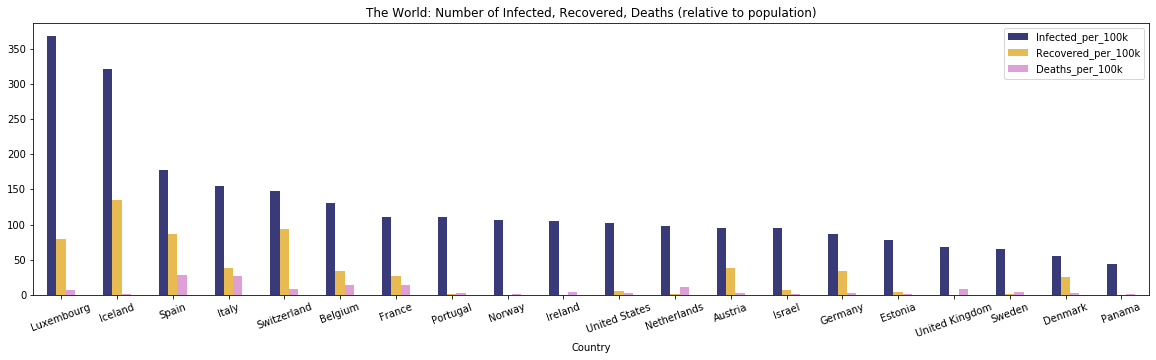

In [22]:
plot_bar('Infected_per_100k', continent = '', top_n = 20)

In [23]:
def plot_time(var, continent=None, top_n = None):


    df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = True,
                    continent = continent)

    # initializing the plot of df
    dic = dict()

    y = var
    group = 'Country'

    tot_countries = df.shape[0]
    
    if top_n:
        if top_n > tot_countries:
            top_n = tot_countries
    else:
        top_n = tot_countries
    
    
    
    fig, ax = plt.subplots()
    # key gives the group name (i.e. category), data gives the actual values

    last_date = df.index.max()
    
    df_last = df[df.index == last_date].sort_values(var, ascending=False)
    country_list = list(df_last[group][:top_n])
    
    for key, data in df.groupby(group):
        
        if key in country_list:
            
            data.plot(y=y, ax=ax, label=key, figsize=(15,8))

            dic[key] = data[y].iloc[-1]
        


    # re-arranging the order of lables, so that it matches the end points of the graphs
    current_handles, current_labels = plt.gca().get_legend_handles_labels()

    mydf = pd.DataFrame.from_dict(dic, orient='index', columns = [y])

    mydf['handles'] = current_handles
    mydf['labels'] = current_labels
    mydf = mydf.sort_values(by=[y], ascending=False)

    new_handles = list(mydf['handles'])
    new_labels = list(mydf['labels'])

    plt.legend(new_handles,new_labels)


    if not continent:
        continent = "The World"

    plt.title('{}: {} per Country'.format(continent, var))
    plt.ylabel('{}'.format(var));

In [24]:
def prepare_time(var, continent=None, top_n = None):


    df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = True,
                    continent = continent)

    # initializing the plot of df
    dic = dict()

    y = var
    group = 'Country'

    tot_countries = df.shape[0]
    
    if top_n:
        if top_n > tot_countries:
            top_n = tot_countries
    else:
        top_n = tot_countries
    

    last_date = df.index.max()
    
    df_last = df[df.index == last_date].sort_values(var, ascending=False)
    countrylist = list(df_last[group][:top_n])
    
    df = df.reset_index()
    
    

    return countrylist, df

    

In [25]:
countrylist, df = prepare_time('Infected_percent', '', top_n = 15)

In [26]:
df

,Date,Continent,Country,Population,Infected,Recovered,Deaths,Infected_percent,Recovered_percent,Deaths_percent,Infected_per_100k,Recovered_per_100k,Deaths_per_100k
0,2020-02-24,Asia,Afghanistan,38928346.0,1.0,0.0,0.0,0.000003,0.0,0.000000,0.002569,0.0,0.000000
1,2020-02-25,Asia,Afghanistan,38928346.0,1.0,0.0,0.0,0.000003,0.0,0.000000,0.002569,0.0,0.000000
2,2020-02-26,Asia,Afghanistan,38928346.0,1.0,0.0,0.0,0.000003,0.0,0.000000,0.002569,0.0,0.000000
3,2020-02-27,Asia,Afghanistan,38928346.0,1.0,0.0,0.0,0.000003,0.0,0.000000,0.002569,0.0,0.000000
4,2020-02-28,Asia,Afghanistan,38928346.0,1.0,0.0,0.0,0.000003,0.0,0.000000,0.002569,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,2020-04-02,Africa,Zimbabwe,14862924.0,8.0,0.0,1.0,0.000054,0.0,0.000007,0.053825,0.0,0.006728
4660,2020-04-03,Africa,Zimbabwe,14862924.0,8.0,0.0,1.0,0.000054,0.0,0.000007,0.053825,0.0,0.006728
4661,2020-04-04,Africa,Zimbabwe,14862924.0,8.0,0.0,1.0,0.000054,0.0,0.000007,0.053825,0.0,0.006728
4662,2020-04-05,Africa,Zimbabwe,14862924.0,8.0,0.0,1.0,0.000054,0.0,0.000007,0.053825,0.0,0.006728


In [27]:
countrylist

['Luxembourg',
 'Iceland',
 'Spain',
 'Italy',
 'Switzerland',
 'Belgium',
 'France',
 'Portugal',
 'Norway',
 'Ireland',
 'United States',
 'Netherlands',
 'Austria',
 'Israel',
 'Germany']

In [28]:
df = df[df.Country.isin(countrylist)]

In [29]:
df[df.Country == 'Iceland']

,Date,Continent,Country,Population,Infected,Recovered,Deaths,Infected_percent,Recovered_percent,Deaths_percent,Infected_per_100k,Recovered_per_100k,Deaths_per_100k
1801,2020-02-28,Europe,Iceland,341243.0,1.0,0.0,0.0,0.000293,0.000000,0.000000,0.293045,0.000000,0.000000
1802,2020-02-29,Europe,Iceland,341243.0,1.0,0.0,0.0,0.000293,0.000000,0.000000,0.293045,0.000000,0.000000
1803,2020-03-01,Europe,Iceland,341243.0,3.0,0.0,0.0,0.000879,0.000000,0.000000,0.879136,0.000000,0.000000
1804,2020-03-02,Europe,Iceland,341243.0,6.0,0.0,0.0,0.001758,0.000000,0.000000,1.758273,0.000000,0.000000
1805,2020-03-03,Europe,Iceland,341243.0,11.0,0.0,0.0,0.003223,0.000000,0.000000,3.223500,0.000000,0.000000
1806,2020-03-04,Europe,Iceland,341243.0,26.0,0.0,0.0,0.007619,0.000000,0.000000,7.619182,0.000000,0.000000
1807,2020-03-05,Europe,Iceland,341243.0,34.0,0.0,0.0,0.009964,0.000000,0.000000,9.963545,0.000000,0.000000
1808,2020-03-06,Europe,Iceland,341243.0,43.0,0.0,0.0,0.012601,0.000000,0.000000,12.600954,0.000000,0.000000
1809,2020-03-07,Europe,Iceland,341243.0,50.0,0.0,0.0,0.014652,0.000000,0.000000,14.652272,0.000000,0.000000
1810,2020-03-08,Europe,Iceland,341243.0,50.0,0.0,0.0,0.014652,0.000000,0.000000,14.652272,0.000000,0.000000


In [30]:
df['Date'] = df.Date.dt.date

/Users/truls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df.Date

251     2020-02-25
252     2020-02-26
253     2020-02-27
254     2020-02-28
255     2020-02-29
           ...    
4503    2020-04-02
4504    2020-04-03
4505    2020-04-04
4506    2020-04-05
4507    2020-04-06
Name: Date, Length: 644, dtype: object

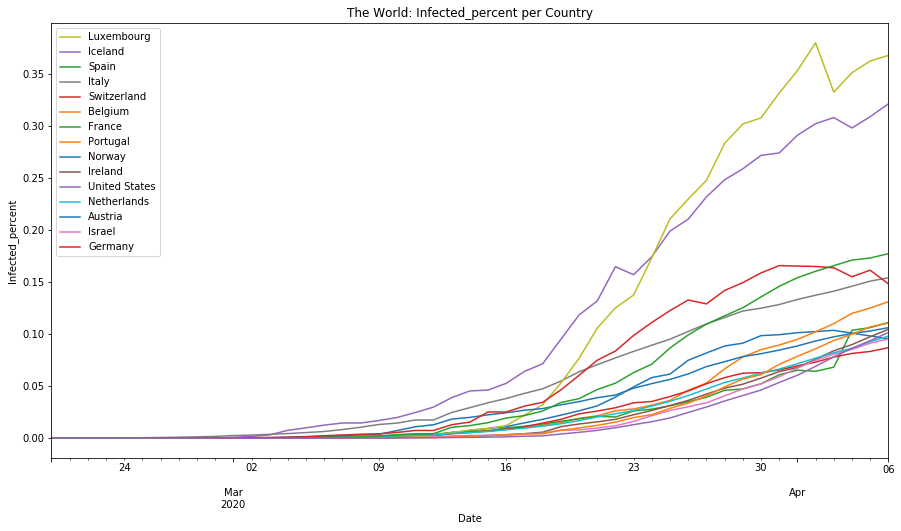

In [32]:
plot_time('Infected_percent', '', top_n = 15)

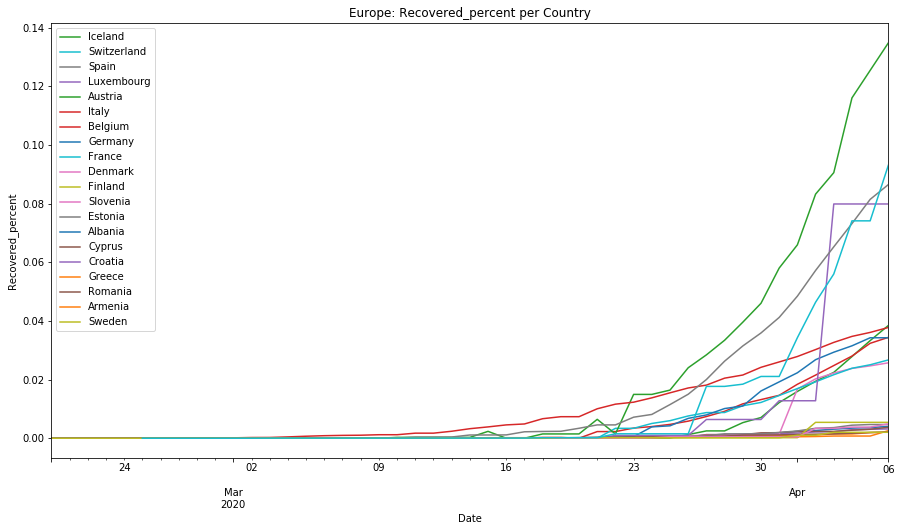

In [33]:
plot_time('Recovered_percent', 'Europe', top_n = 20)

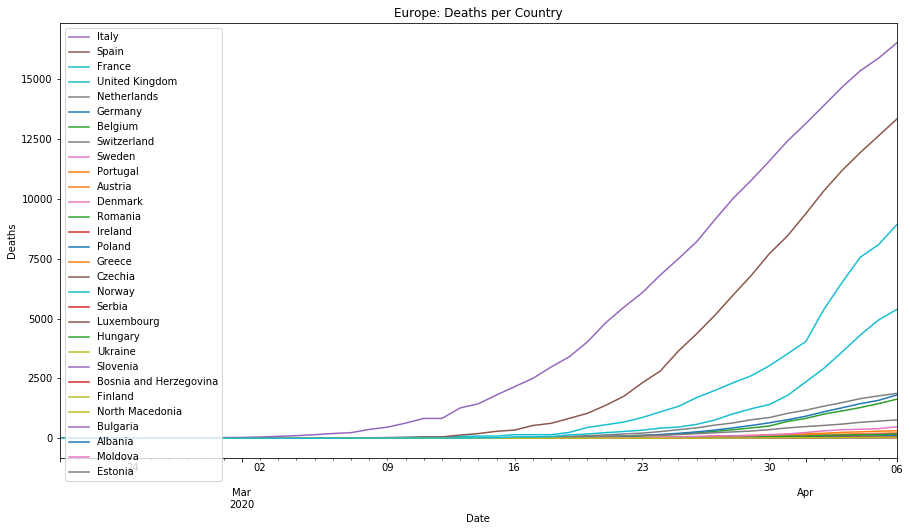

In [34]:
plot_time('Deaths', 'Europe', top_n = 30)

In [35]:
def prepare_geo():
    
    fp = 'web_app/data/ne_10m_admin_0_countries.shp'

    gdf = gpd.read_file(fp)
    
    gdf = gdf.rename(columns={"ADMIN": "Country", "ADM0_A3": "Short"})
    
    gdf = gdf[['Country', 'Short', 'geometry']]
    
    
    df_all = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = False,
                    continent = None)
    
    
    
    df = gdf.merge(df_all, how='left', on='Short').drop(columns=['Date'])
    
    df.fillna(0, inplace = True)
    
    return df
    

### Totals

In [36]:
df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = False,
                    continent = None)
df_tot = pd.DataFrame(df.sum()).T

df_tot = df_tot[['Population', 'Infected', 'Recovered', 'Deaths']]

In [37]:
df_tot['Recovered_percent'] = 100*df_tot['Recovered']/(df_tot['Population'] + 1.0)
df_tot['Deaths_percent'] = 100*df_tot['Deaths']/(df_tot['Population'] + 1.0)
df_tot['Infected_percent'] = 100*df_tot['Infected']/(df_tot['Population'] + 1.0)
df_tot['Recovered_per_100k'] = 100000*df_tot['Recovered']/(df_tot['Population'] + 1.0)
df_tot['Deaths_per_100k'] = 100000*df_tot['Deaths']/(df_tot['Population'] + 1.0)
df_tot['Infected_per_100k'] = 100000*df_tot['Infected']/(df_tot['Population'] + 1.0)

In [38]:
df_tot

,Population,Infected,Recovered,Deaths,Recovered_percent,Deaths_percent,Infected_percent,Recovered_per_100k,Deaths_per_100k,Infected_per_100k
0,7.59026e+09,989368,274923,74443,0.00362205,0.00098077,0.0130347,3.62205,0.98077,13.0347


### Shift (historical)

In [52]:
df = df_prepare('data/covid_19_data.csv', 'data/population_2020_for_johnhopkins_data.csv',
                    historical = True,
                    continent = None)

In [53]:
countries = df.Country.unique()

In [61]:
df.loc[df['Country'] == 'Zimbabwe']

,Continent,Country,Population,Infected,Recovered,Deaths,Infected_percent,Recovered_percent,Deaths_percent,Infected_per_100k,Recovered_per_100k,Deaths_per_100k
Date,,,,,,,,,,,,
2020-03-20,Africa,Zimbabwe,14862924.0,1.0,0.0,0.0,0.000007,0.0,0.000000,0.006728,0.0,0.000000
2020-03-21,Africa,Zimbabwe,14862924.0,3.0,0.0,0.0,0.000020,0.0,0.000000,0.020184,0.0,0.000000
2020-03-22,Africa,Zimbabwe,14862924.0,3.0,0.0,0.0,0.000020,0.0,0.000000,0.020184,0.0,0.000000
2020-03-23,Africa,Zimbabwe,14862924.0,2.0,0.0,1.0,0.000013,0.0,0.000007,0.013456,0.0,0.006728
2020-03-24,Africa,Zimbabwe,14862924.0,2.0,0.0,1.0,0.000013,0.0,0.000007,0.013456,0.0,0.006728
2020-03-25,Africa,Zimbabwe,14862924.0,2.0,0.0,1.0,0.000013,0.0,0.000007,0.013456,0.0,0.006728
2020-03-26,Africa,Zimbabwe,14862924.0,2.0,0.0,1.0,0.000013,0.0,0.000007,0.013456,0.0,0.006728
2020-03-27,Africa,Zimbabwe,14862924.0,4.0,0.0,1.0,0.000027,0.0,0.000007,0.026913,0.0,0.006728
2020-03-28,Africa,Zimbabwe,14862924.0,6.0,0.0,1.0,0.000040,0.0,0.000007,0.040369,0.0,0.006728


In [66]:
for i, country in enumerate(countries):
    
    if i == 0:
        
        
        df1 = df.loc[df['Country'] == country]
        df1['Deaths_16_days_ago'] = df1['Deaths'].shift(16)
        df1['Death_rate'] = df1['Deaths_16_days_ago'] / (df1['Recovered'] + df1['Deaths_16_days_ago'])
        df1['Recovered_proj_in_16_days'] = df1['Deaths']*(1/(df1['Death_rate'] + 0.0000001) - 1)

    elif i > 0:
    
        df_single = df.loc[df['Country'] == country]
        df_single['Deaths_16_days_ago'] = df_single['Deaths'].shift(16)
        df_single['Death_rate'] = df_single['Deaths_16_days_ago'] / (df_single['Recovered'] + df_single['Deaths_16_days_ago'])
        df_single['Recovered_proj_in_16_days'] = df_single['Deaths']*(1/(df_single['Death_rate'] + 0.0000001) - 1)

        frames = [df1, df_single]
 
        df1 = pd.concat(frames)
        #print(df_single.iloc[-1])
    
    

/Users/truls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/truls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/truls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [82]:
last_date = str(df1.index[-1])[:10]


df_new = df1.loc[df1.index == last_date].fillna(0)

In [83]:
df_new

,Continent,Country,Population,Infected,Recovered,Deaths,Infected_percent,Recovered_percent,Deaths_percent,Infected_per_100k,Recovered_per_100k,Deaths_per_100k,Deaths_16_days_ago,Death_rate,Recovered_proj_in_16_days
Date,,,,,,,,,,,,,,,
2020-04-06,Asia,Afghanistan,38928346.0,338.0,18.0,11.0,0.000868,0.000046,0.000028,0.868262,0.046239,0.028257,0.0,0.000000,1.100000e+08
2020-04-06,Europe,Albania,2877797.0,240.0,116.0,21.0,0.008340,0.004031,0.000730,8.339710,4.030860,0.729725,2.0,0.016949,1.217993e+03
2020-04-06,Africa,Algeria,43851044.0,1160.0,90.0,173.0,0.002645,0.000205,0.000395,2.645319,0.205240,0.394517,15.0,0.142857,1.037999e+03
2020-04-06,Africa,Angola,32866272.0,12.0,2.0,2.0,0.000037,0.000006,0.000006,0.036512,0.006085,0.006085,0.0,0.000000,2.000000e+07
2020-04-06,America,Argentina,45195774.0,1181.0,325.0,48.0,0.002613,0.000719,0.000106,2.613076,0.719094,0.106205,4.0,0.012158,3.899968e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-06,Asia,Uzbekistan,33469203.0,425.0,30.0,2.0,0.001270,0.000090,0.000006,1.269824,0.089635,0.005976,0.0,0.000000,2.000000e+07
2020-04-06,America,Venezuela,28435940.0,93.0,65.0,7.0,0.000327,0.000229,0.000025,0.327051,0.228584,0.024617,0.0,0.000000,6.999999e+07
2020-04-06,Asia,Vietnam,97338579.0,150.0,95.0,0.0,0.000154,0.000098,0.000000,0.154101,0.097597,0.000000,0.0,0.000000,0.000000e+00


In [ ]:
usa = df[df['Country'] == 'United States']

In [ ]:
usa['Deaths_16_days_ago'] = usa['Deaths'].shift(16)

In [ ]:
usa['Death_rate'] = usa['Deaths_16_days_ago'] / (usa['Recovered'] + usa['Deaths_16_days_ago'])

In [ ]:
usa['Recovered_proj_in_16_days'] = usa['Deaths']*(1/(usa['Death_rate'] + 0.0000001) - 1)

In [ ]:
usa.iloc[-1]

In [ ]:
def plot_geo(colname, continent=None):
    
    
    data = prepare_geo()
    
    data = data[data.Country!="Antarctica"]

    if continent:
        data = data[data.Continent == continent] 

    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    
    
    if not continent:
        #ax.set(xlim=(-24, 40), ylim=(35, 75))
        fontsize = 6
    elif continent == 'Europe':
        ax.set(xlim=(-24, 40), ylim=(35, 75))
        fontsize = 8
        ax.text(1, 46, 'France', fontsize=fontsize)
        ax.text(8, 62, 'Norway', fontsize=fontsize)
        
    elif continent == 'America':
        ax.set(xlim=(-130, -30), ylim=(-55, 75))
        fontsize = 8        
    else:
        fontsize = 8

    

    data.plot(column=colname, ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "{}".format(colname), 
                                                                      'orientation': "vertical"})

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    #plt.xticks([10.7, 10.8, 10.9])
    #plt.yticks([59.8, 59.9, 60.0])
    #plt.suptitle('Marka', y=0.73, fontsize=10)

    plt.title('{}: {}\n'.format(continent, colname),  fontsize=18)
    
    #plt.axis('off')

    skip_list = ['Norway', 'France']

    for idx, row in data.iterrows():
        
        if (len(str(row['Country'])) > 3) & (str(row['Country']) not in skip_list):
            plt.annotate(s=row['Country'], xy=row['geometry'].centroid.coords[0],
                     horizontalalignment='center', fontsize=fontsize)

In [ ]:
plot_geo(colname = 'Infected_percent', continent = 'Europe')

In [ ]:
plot_geo(colname = 'Recovered_per_100k', continent = 'Europe')

In [ ]:
plot_geo(colname = 'Deaths_per_100k', continent = 'Europe')

In [ ]:
dfx = prepare_geo()
fig = px.choropleth(dfx, locations="Short",
                    color="Infected_per_100k", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:
dfx

In [ ]:
dfx = dfx.fillna(0)

In [ ]:
dfx = dfx[['Country', 'Short', 'Infected_per_100k']]

In [ ]:
dfx.sort_values('Infected_per_100k', ascending=False, inplace=True)

In [ ]:
countrylist = dfx.Country.unique().tolist()

In [ ]:
countrylist

In [ ]:
x_val = dfx[dfx['Country'] == 'Luxembourg'].Infected_per_100k.tolist()
x_val